In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Plotting Synthetic Data - Gaussian distribution

**Objective:** Generate synthetic data that follows two different gaussian distributions with different mean and variance.

In [2]:
# generate samples from normal distributions with two dimensional
# size of samples
n = 30
X1 = np.random.normal(loc=(5, 10), scale=5, size=(n, 2)) # loc and scale indicate mean and variance
X2 = np.random.normal(loc=(20, 20), scale=5, size=(n, 2)) # X1 and X2 have different mean
Y1 = np.ones(n)
Y2 = np.ones(n) * -1                      # labeling as 1 for X1 and -1 for X2

In [3]:
# concatenate X1 and X2
X_train = np.concatenate((X1, X2))
Y_train = np.concatenate((Y1, Y2))
X_train.shape  # sanity check for shape of the data array -> (number of samples, dimension)

(60, 2)

### Plotting X_train data

**Objective:** Plot the X_train with different colors correspoding to the labels (let 1 label to be blue and -1 to be red)

Use ```plt.scatter()``` method to plot the sample points

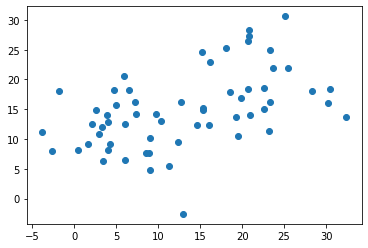

In [4]:
# plot the samples without specifying color
plt.scatter(X_train[:, 0].T, X_train[:, 1].T)
plt.show()

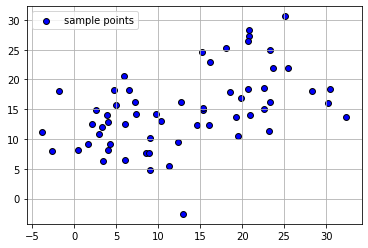

In [5]:
# We can specify the color , edgecolor, legend, and point size.
# 'b' and 'k' means blue and black, s is fontsize (sample point size)
plt.scatter(X_train[:, 0].T, X_train[:, 1].T, color='b', edgecolor='k', label='sample points', s=35) 
plt.grid(True)  # grid on
plt.legend()    # display the label ('sample points')
plt.show()

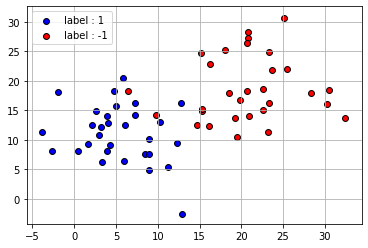

In [6]:
# Plot the samples with color corresponding to the 1, -1 label by using mask indexing
plt.scatter(X_train[Y_train==1][:, 0].T, X_train[Y_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[Y_train==-1][:, 0].T, X_train[Y_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()
plt.show()

### Plotting Arbitrary Linear Boundary

**objective:** understand ```np.meshgrid()``` method and draw boundary by using it

Assume that the boundary is of the form:
$ax_1+bx_2 + c = 0$ where $a, b$ and $c$ are arbitrary in this case. (are not learned yet) 

We must plot this boundary based on whether $ax_1+bx_2 + c = 0$ or not for all data sample point $(x_1, x_2)$. Therefore, we need to prepare all the grid point of 2D dimensional space and compute $ax_1+bx_2 + c$ for all grids. This is what we will do using ```np.meshgrid()``` method.

In [7]:
# specify the min max value of x-axis and y-axis for meshgrids
x_min, x_max = -30, 30
y_min, y_max = -30, 30
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30)) # 30 grids for each axis
grids = np.c_[xx.ravel(), yy.ravel()]
grids.shape # total 30 x 30 = 900 grid points

(900, 2)

In [8]:
# initialize a, b and c with arbitrary number
ab = np.random.normal(size=(2))
c = np.random.normal(size=(1))

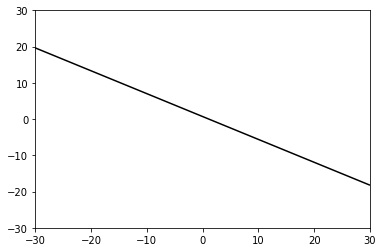

In [9]:
# compute ax_1 + bx_2 + c for all grids
Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k') # draw boundary based on whether Z is equal to 0
plt.show()

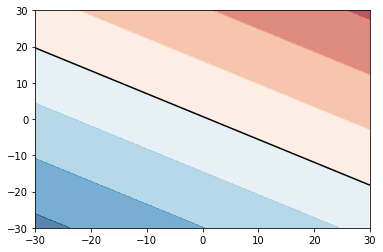

In [10]:
# Draw with colormap
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)
plt.show()

**Merge all the plots for data points and boundary**

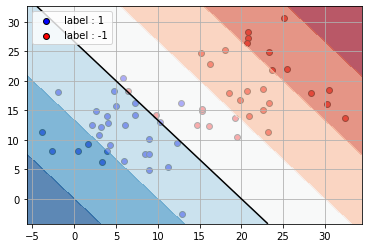

In [11]:
# initialize a, b and c with arbitrary number
ab = np.array([-0.4, -0.3])
c = np.array([8])

# Plot the samples with color corresponding to the 1, -1 label by using mask indexing
plt.scatter(X_train[Y_train==1][:, 0].T, X_train[Y_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[Y_train==-1][:, 0].T, X_train[Y_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

axes = plt.gca() # get current axes object (similar to MATLAB plot)
x_min, x_max = axes.get_xlim() 
y_min, y_max = axes.get_ylim() # get min max value for each axis of current plot

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30)) # 30 grids for each axis
grids = np.c_[xx.ravel(), yy.ravel()]
Z = grids@ab + c

plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)  # draw colormap if you want

plt.show()

### Exercise 1) Draw Perpendicular Equidistant Line between Two Points

In [12]:
# Given two points x y
A = np.array([5, 10])
B = np.array([20, 20])
A, B

(array([ 5, 10]), array([20, 20]))

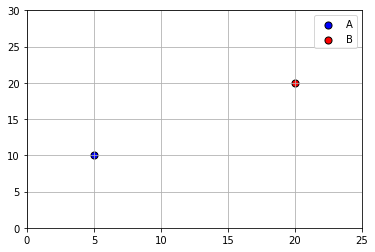

In [13]:
# plot two points
xlim = (0, 25)
ylim = (0, 30)

plt.scatter(A[0], A[1], color='b', edgecolor='k', label='A', s=50)
plt.scatter(B[0], B[1], color='r', edgecolor='k', label='B', s=50)
plt.legend()
plt.grid(True)
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.show()

In [14]:
# define functions for checking which point is the nearest point from itself given any samples.
# return 0 if the A is closest point and 1 otherwise
def nearest(A, B, sample):
    dist_A = np.linalg.norm(A - sample)  # compute euclidean distance
    dist_B = np.linalg.norm(B - sample)
    if dist_A < dist_B:
        return 0  
    else:
        return 1

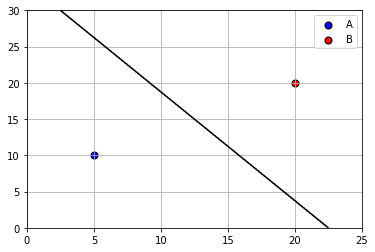

In [15]:
# plot two points
plt.scatter(A[0], A[1], color='b', edgecolor='k', label='A', s=50)
plt.scatter(B[0], B[1], color='r', edgecolor='k', label='B', s=50)
plt.legend()
plt.grid(True)
plt.xlim(*xlim)
plt.ylim(*ylim)

xx, yy = np.meshgrid(np.linspace(*xlim, 500), np.linspace(*ylim, 500)) # 500 grids for each axis
grids = np.c_[xx.ravel(), yy.ravel()]

Z = []
# return the closest point from each grid points
for sample in grids:
    corr_label = nearest(A, B, sample)
    Z.append(corr_label)

Z = np.array(Z).reshape(xx.shape)

# plot the equidistant line
plt.contour(xx, yy, Z, levels=[0.5], colors='k') 
plt.show()

### Exercise 2) Draw Equidistant Boundary between "Three" Centroids from Normal Distribution Data

**Definition of Centroids:** Mean position(center of mass) of all the data points which belongs to the same clustering (distribution)

In [16]:
# generate samples from three different normal distributions
# size of samples
n = 30
X1 = np.random.normal(loc=(5, -5), scale=5, size=(n, 2)) # loc and scale indicate mean and variance
X2 = np.random.normal(loc=(20, 20), scale=5, size=(n, 2))
X3 = np.random.normal(loc=(-20, 20), scale=5, size=(n, 2))

# concatenate X1 and X2
X_total = np.concatenate((X1, X2, X3))
X_total.shape  # sanity check for shape of the data array -> (number of samples, dimension)

(90, 2)

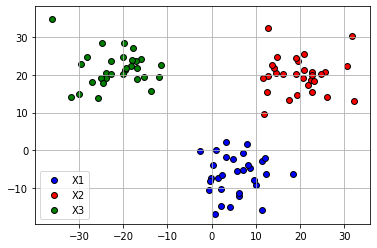

In [17]:
# Plot the samples with color corresponding to each gaussian distributions
plt.scatter(X1[:, 0].T, X1[:, 1].T, color='b', edgecolor='k', label='X1', s=35)
plt.scatter(X2[:, 0].T, X2[:, 1].T, color='r', edgecolor='k', label='X2', s=35)
plt.scatter(X3[:, 0].T, X3[:, 1].T, color='g', edgecolor='k', label='X3', s=35)
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

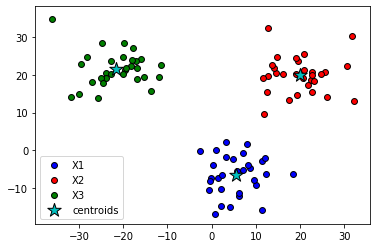

In [18]:
# plot with centroids
X1_centr = np.mean(X1, axis=0, keepdims=True)  # compute the centroid
X2_centr = np.mean(X2, axis=0, keepdims=True)
X3_centr = np.mean(X3, axis=0, keepdims=True)
centrs = np.concatenate([X1_centr, X2_centr, X3_centr])

plt.scatter(X1[:, 0].T, X1[:, 1].T, color='b', edgecolor='k', label='X1', s=35)
plt.scatter(X2[:, 0].T, X2[:, 1].T, color='r', edgecolor='k', label='X2', s=35)
plt.scatter(X3[:, 0].T, X3[:, 1].T, color='g', edgecolor='k', label='X3', s=35)

# Plot the centroids
plt.scatter(centrs[:, 0].T, centrs[:, 1].T, color='c', edgecolor='k', marker='*', label='centroids', s=200)

plt.legend(loc='lower left')
plt.show()

In [19]:
def nearest_centr(centroids, grids):
    '''
    centroids: [N1, D]
    grids: [N2, D]
    '''
    # compute eucliean distance using BroadCasting!
    grids = grids[:, np.newaxis] # [N2, D] -> [N2, 1, D]
    distances = np.linalg.norm(centroids - grids, axis=-1) # [N2, N1]
    outputs = np.argmin(distances, axis=-1) # pick closest distant centroid!
    return outputs

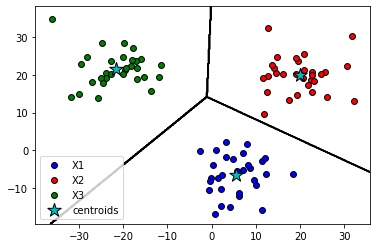

In [22]:
# plot with centroids
X1_centr = np.mean(X1, axis=0, keepdims=True)  # compute the centroid
X2_centr = np.mean(X2, axis=0, keepdims=True)
X3_centr = np.mean(X3, axis=0, keepdims=True)
centrs = np.concatenate([X1_centr, X2_centr, X3_centr])

plt.scatter(X1[:, 0].T, X1[:, 1].T, color='b', edgecolor='k', label='X1', s=35)
plt.scatter(X2[:, 0].T, X2[:, 1].T, color='r', edgecolor='k', label='X2', s=35)
plt.scatter(X3[:, 0].T, X3[:, 1].T, color='g', edgecolor='k', label='X3', s=35)

# Plot the centroids
plt.scatter(centrs[:, 0].T, centrs[:, 1].T, color='c', edgecolor='k', marker='*', label='centroids', s=200)

# generate meshgrids
axes = plt.gca()
xlim = axes.get_xlim()
ylim = axes.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, 500), np.linspace(*ylim, 500)) # 500 grids for each axis
grids = np.c_[xx.ravel(), yy.ravel()]

Z = nearest_centr(centrs, grids).reshape(xx.shape)

# plot the equidistant line
plt.contour(xx, yy, Z, colors='k') 
plt.legend(loc='lower left')
plt.show()